# Hausaufgabe 5 

## Integration einer Bewegungsgleichung: Freier Fall - Wiederholung

In dieser Aufgabe werden wir erneut die Bewegungsgleichung des freien Falls numerisch mit dem Euler Verfahren lösen. Die Bewegungsgleichung hat die Form:
\begin{equation}\tag{1}
 \ddot x = \frac{\mathrm{d}^2x}{\mathrm{d}t^2}= a
\end{equation}

Dieses Mal soll die Bewegungsgleichung nicht "per Hand" sondern rekursiv mittels einer Schleife gelöst werden. 

## 1. Integration mit Schleife

**a)** Lösen Sie erneut Gleichung (1) für fünf Zeitschritte $\Delta t = 0.1$, indem Sie die Gleichungen (3) und (4) für die Anfangswerte $x_0=x\left(t=0\right) = 2$ und $v_0=v\left(t=0\right) = 1$ numerisch mit Hilfe einer Schleife integrieren. Dabei soll $a=-9.81$ sein. Speichern Sie die numerisch berechneten Positionen in einer Liste indem Sie `append()` benutzen.

Als Erinerrung:

\begin{equation} \tag{2}
x\!\left( t \right) = x_0 + v_0 t + \frac{1}{2} a t^2.
\end{equation}

\begin{align}\tag{3}
        x\left(t+\Delta t \right) &= x\left(t\right) + v\left(t\right) \Delta t \\ 
        v\left(t+\Delta t \right) &= v\left(t\right) + a\Delta t \tag{4}
    \end{align}
    


In [5]:
a = -9.81
x0 = 2
v0 = 1
dt = 0.1
xlist = [x0]
vlist = [v0]
# Die nötigen Listen und Variablen werden definiert.
def x(t):
    x = x0 + v0*t +(1/2)*a*(t)**2
    return(x)
def v(t):
    v = v0 + a*t
    return(v)
# zur einfacheren Nutzung werden x und v als Funktion definiert
for i in range(4):
    xi = x0 + (i+1)*v0*dt+(((i)**2+i)/2)*a*(dt)**2
    xlist.append(xi)
for i in range(4):
    vi = v0 + (i+1)*a*dt
    vlist.append(vi)
# xi und vi werden jeweils in Abhängigkeit der definierten Variablen x0, v0, dx definiert und die Werte werden in die Liste angehängt. 
print(xlist)
print(vlist)

[2, 2.1, 2.1019, 2.0056999999999996, 1.8114]
[1, 0.018999999999999906, -0.9620000000000002, -1.943, -2.9240000000000004]


**b)** Plotten Sie diese Positionen in einem Diagramm mit der Bahnkurve (Gleichung (2)). Benutzen Sie das mit `ax.scatter()` erweiterte Grundgerüst von `helpPlotScatter.ipynb`. 

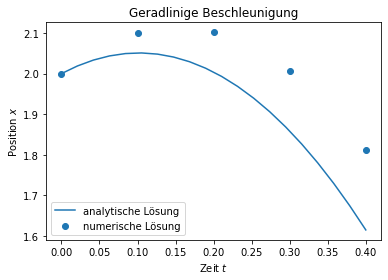

In [6]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 4*dt, 20)
xAnalytic = x0 + v0 * t + 0.5 * a * t**2

tNumeric = np.linspace(0,4*dt,5) 

fig, ax = plt.subplots()

ax.set_title("Geradlinige Beschleunigung")  # Titel
ax.plot(t, xAnalytic, label='analytische Lösung')  # x-Wert, hier x, y Wert hier xQuadrat
ax.scatter(tNumeric, xlist, label='numerische Lösung')
ax.set_xlabel("Zeit $t$")
ax.set_ylabel("Position $x$")

plt.legend(loc=3)
plt.show()
# Mit dem vorgegebenen Grundgerüst wird die eigene Liste eingesetzt und der Graph aus Hausaufgabe 3 geplottet.

## 2. Variation des Zeitschrittes

Sie sollten nun die Abbildung aus Hausaufgabe 3 reproduziert haben.

**a)** Wiederholen Sie Aufgabe 1 mit einem Zeitschritt $\Delta t = 0.005$. Achten Sie darauf, dass die Integrationszeit gleich bleibt! Da Sie nun sehr viele Werte erzeugt haben, ist es sinnvoller die numerische Lösung ebenfalls in einem Linienplot mit `ax.plot()` darzustellen.

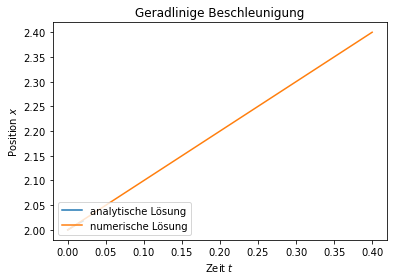

In [3]:
a = -9.81
x0 = 2
v0 = 1
dt = 0.005
xlist = [x0]
vlist = [v0]
# Zuerst werden zur Sicherheit die Variablen, Listen und Funktionen neu definiert und dt wie gefragt verändert. Dann wird nach dem selben 
# Schema wie oben die Liste um 80 Werte in Schritten von 0.005s erweitert.
def x(t):
    x = x0 + v0*t +(1/2)*a*(t)**2
    return(x)
def v(t):
    v = v0 + a*t
    return(v)
for i in range(80):
    xi = x0 + (i+1)*v0*dt+(((i)**2+i)/2)*a*(dt)**2
    xlist.append(xi)
for i in range(80):
    vi = v0 + (i+1)*a*dt
    vlist.append(vi)
# Der Graph wird dann geplottet, die neu berechneten Werte dabei eingesetzt.
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 4*dt, 20)
xAnalytic = x0 + v0 * t + 0.5 * a * t**2

tNumeric = np.linspace(0,80*dt,81) 

fig, ax = plt.subplots()

ax.set_title("Geradlinige Beschleunigung") 
ax.plot(t, xAnalytic, label='analytische Lösung')
ax.plot(tNumeric, xlist, label='numerische Lösung')
ax.set_xlabel("Zeit $t$")
ax.set_ylabel("Position $x$")

plt.legend(loc=3)
plt.show()

**b)** Berechnen Sie die quadratische Abweichung $\mathrm{SE}\left(t\right)$ zwischen der numerischen und analytischen Lösung abhängig vom Zeitschritt:
   $$ 
   \mathrm{SE}\left(t\right) = \left(x_{\mathrm{numerisch}}\left(t\right) - x_\mathrm{analytisch}\left(t\right)\right) ^2 \, .
   $$
Plotten Sie die quadratische Abweichung gegen die Zeit. Benutzen Sie geeignete Beschriftungen! 

Beschreiben Sie kurz, was Sie beobachten. 

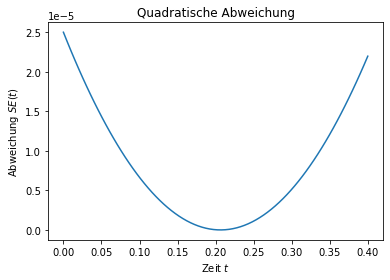

In [4]:
a = -9.81
x0 = 2
v0 = 1
dt = 0.005
SElist = []
# Noch einmal werden die Variablen gesetzt und dann die Formel wie gewünscht definiert. Zur Verwendung im Plot wird daraus eine neue Liste erstellt.
def SE(t):
    se = ((x(t)) - (x0 + ((t/0.005)+1)*v0*dt+(((t/0.005)**2+(t/0.005))/2)*a*(dt)**2))**2
    return(se)
for i in range(80):
    se0 = SE(i*dt)
    SElist.append(se0)
# Die quadratische Abweichung wird dann über die Zeit geplottet.
fig, ax = plt.subplots()

t = np.linspace(0, 80*dt, 80)  
ax.set_title("Quadratische Abweichung") 
ax.plot(t, SElist) 
ax.set_xlabel("Zeit $t$")
ax.set_ylabel("Abweichung $SE(t)$")

plt.show()
# Es fällt auf, dass die wahren Werte und die numerisch bestimmten Werte extrem nah beieinander liegen. In der Graphik aus 2a) sind sie quasi
# nicht sichtbar verschieden. Die niedrigste Abweichung liegt dabei in der Mitte des definierten Intervalls, die höchste außen. Wahrscheinlich 
# ist, dass bei Betrachtung eines breiteren Intervalls die Abweichung größer würde, was sich aber mit feineren Werten beheben ließe.